# Stroke Predicton - Unsupervised

##  Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Import Datasets

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_train_oversampled = pd.read_csv('X_train_oversampled.csv')
y_train_oversampled = pd.read_csv('y_train_oversampled.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

### PCA Projection to 2D - Unbalanced

In [3]:
#PCA
x = X_train.values
y = y_train.values
x = StandardScaler().fit_transform(x)
#pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)
finalDf = pd.concat([principalDf, y_train[['stroke']]], axis = 1)
print(finalDf)
pca.explained_variance_ratio_

      principal component 1  principal component 2  stroke
0                 -1.377230              -0.666045       0
1                  3.589161              -0.463484       0
2                  4.379885               1.954463       0
3                 -0.681899              -1.992092       0
4                 -2.525080              -0.576877       0
...                     ...                    ...     ...
3061              -1.106109              -2.075074       0
3062              -2.177334               1.528368       1
3063              -1.485227               0.643025       0
3064              -0.898557              -1.227430       0
3065              -1.755110              -1.639634       0

[3066 rows x 3 columns]


array([0.19198211, 0.09980547])

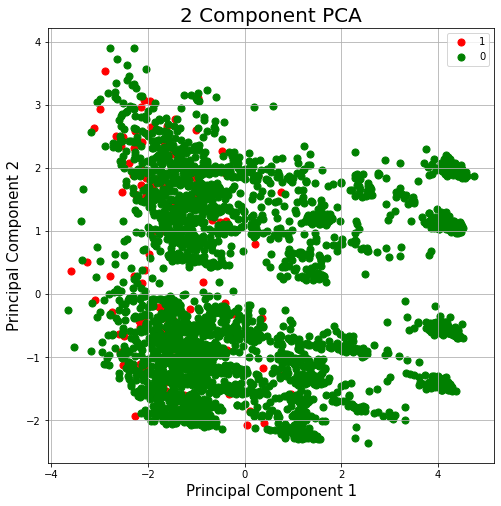

In [4]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA Projection to 2D - Balanced

In [5]:
#PCA
x = X_train_oversampled.values
y = y_train_oversampled.values
x = StandardScaler().fit_transform(x)
#pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)
finalDf = pd.concat([principalDf, y_train_oversampled[['stroke']]], axis = 1)
print(finalDf)
pca.explained_variance_ratio_

      principal component 1  principal component 2  stroke
0                 -0.512910              -2.645029       0
1                  4.853223              -0.675850       0
2                  5.399920               1.513791       0
3                  0.187628              -0.945352       0
4                 -1.554282              -1.407802       0
...                     ...                    ...     ...
5847              -0.819740               0.985161       1
5848              -1.008283               1.246438       1
5849               1.185504              -0.944440       1
5850              -0.698471              -1.762960       1
5851              -2.056815               2.826475       1

[5852 rows x 3 columns]


array([0.17342286, 0.1077516 ])

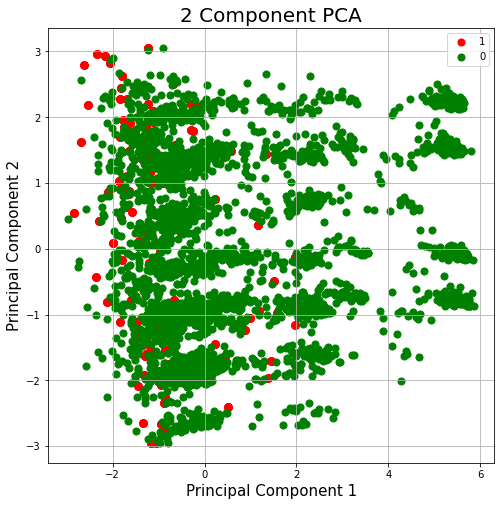

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# K-Means



In [7]:
print(X_train_oversampled)
print(y_train_oversampled)

       age  hypertension  heart_disease  avg_glucose_level   bmi  \
0     67.0             0              0             110.42  24.9   
1      7.0             0              0             114.82  33.3   
2      9.0             0              0              84.17  17.4   
3     28.0             0              0              98.05  24.7   
4     82.0             1              0             107.21  27.0   
...    ...           ...            ...                ...   ...   
5847  68.0             0              0              77.82  27.5   
5848  78.0             0              0              78.03  23.9   
5849  60.0             0              0              89.22  37.8   
5850  79.0             0              0              93.05  24.2   
5851  64.0             0              1             191.61  37.5   

      gender_Female  gender_Male  gender_Other  ever_married_No  \
0                 1            0             0                0   
1                 1            0             0   